In [1]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv')

In [4]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [8]:
df.isnull()

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender    Age  \
0         False       False    False        False      False   False  False   
1         False       False    False        False      False   False  False   
2         False       False    False        False      False   False  False   
3         False       False    False        False      False   False  False   
4         False       False    False        False      False   False  False   
...         ...         ...      ...          ...        ...     ...    ...   
9995      False       False    False        False      False   False  False   
9996      False       False    False        False      False   False  False   
9997      False       False    False        False      False   False  False   
9998      False       False    False        False      False   False  False   
9999      False       False    False        False      False   False  False   

      Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0      False    False          False      False           False   
1      False    False          False      False           False   
2      False    False          False      False           False   
3      False    False          False      False           False   
4      False    False          False      False           False   
...      ...      ...            ...        ...             ...   
9995   False    False          False      False           False   
9996   False    False          False      False           False   
9997   False    False          False      False           False   
9998   False    False          False      False           False   
9999   False    False          False      False           False   

      EstimatedSalary  Exited  
0               False   False  
1               False   False  
2               False   False  
3               False   False  
4               False   False  
...               ...     ...  
9995            False   False  
9996            False   False  
9997            False   False  
9998            False   False  
9999            False   False  

[10000 rows x 14 columns]

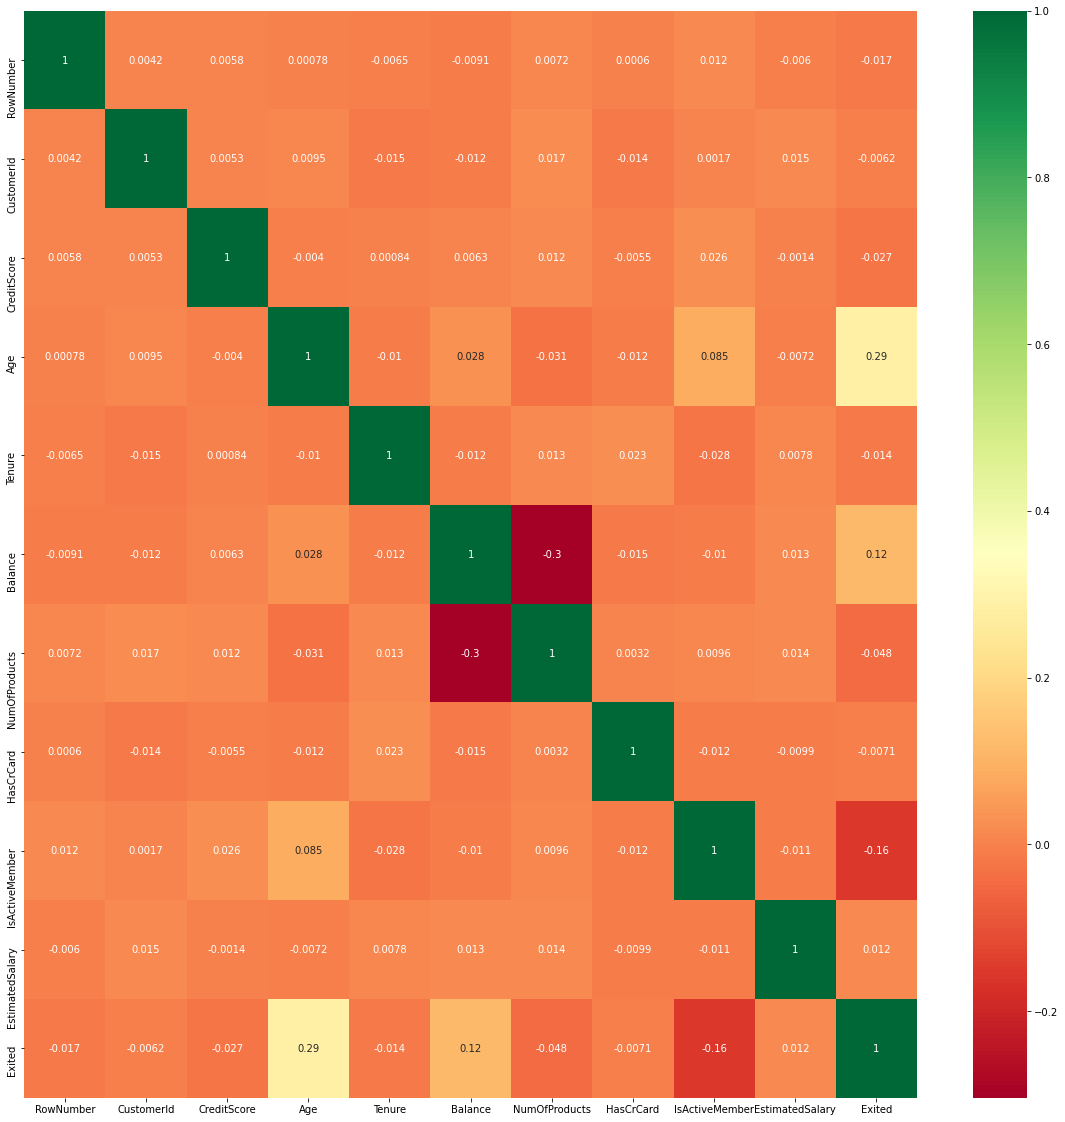

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

##get corelation of each feature in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

##plt heat map
g = sns.heatmap(df[top_corr_features].corr(),annot = True,cmap='RdYlGn')

In [13]:
## get dependent and independent features 
X = df.iloc[:,3:13]
Y = df.iloc[:,13]

In [14]:
## now changing categorial features into num
geography = pd.get_dummies(X['Geography'],drop_first = True)

In [15]:
geography.head()

Germany  Spain
0        0      0
1        0      1
2        0      0
3        0      0
4        0      1

In [16]:
gender = pd.get_dummies(X['Gender'],drop_first=True)


In [17]:
gender.head()

Male
0     0
1     0
2     0
3     0
4     0

In [18]:
##drop categ features
X = X.drop(['Geography','Gender'],axis = 1)

In [20]:
X.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  
0               1        101348.88  
1               1        112542.58  
2               0        113931.57  
3               0         93826.63  
4               1         79084.10

In [21]:
## now concatinating
X= pd.concat([X,geography,gender],axis= 1)


In [22]:
X.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Germany  Spain  Male  
0               1        101348.88        0      0     0  
1               1        112542.58        0      1     0  
2               0        113931.57        0      0     0  
3               0         93826.63        0      0     0  
4               1         79084.10        0      1     0

# hyper parameter optimisation

In [24]:
params = {
  "learning_rate"  :[0.05,0.10,0.15,0.20,0.25,0.30],
  "max_depth"      :[3,4,5,6,8,10,12,15],
  "min_child_weight":[1,3,5,7],
  "gamma"           :[0.0,0.1,0.2,0.3,0.4],
  "colsample_bytree" :[0.3,0.4,0.5,0.7]
}

In [25]:
## doing random search cv
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost

In [28]:
def timer (start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif  start_time:
        thour,temp_sec = divmod((datetime.now() - start_time).total_seconds(),3600)
        tmin,tsec = divmod(temp_sec,60)
        print('\n Time taken: %i hours %i minutes and %s seconds. '% (thour ,tmin,round(tsec,2)))

In [29]:
classifier = xgboost.XGBClassifier()

In [30]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [32]:
from datetime import datetime

##here we go
start_time = timer(None) ##timing start frm here
random_search.fit(X,Y)
timer(start_time)## timing stops here

Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\python3.9\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 12.62 seconds. 


In [34]:
X.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Germany  Spain  Male  
0               1        101348.88        0      0     0  
1               1        112542.58        0      1     0  
2               0        113931.57        0      0     0  
3               0         93826.63        0      0     0  
4               1         79084.10        0      1     0

In [35]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [52]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=5,missing = None, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y,cv=10)